# Install & Import Library

In [1]:
!pip install niapy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.0/188.0 kB 3.2 MB/s eta 0:00:00


In [2]:
pip install numpy==1.23.5

In [3]:
import pandas as pd
import numpy as np
import pickle
import joblib

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC

from niapy.problems import Problem
from niapy.task import OptimizationType, Task
from niapy.algorithms.basic import GravitationalSearchAlgorithm

# Load Data

**Clone the repository containing the dataset and necessary files**

In [4]:
!git clone https://github.com/Hafiyyanrevi/Drug-Side-Effect-Prediction-GSA-SVM.git data_TA

Cloning into 'data_TA'...
remote: Enumerating objects: 165, done.
remote: Counting objects: 100% (101/101), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 165 (delta 49), reused 63 (delta 21), pack-reused 64 (from 1)
Receiving objects: 100% (165/165), 659.56 KiB | 2.75 MiB/s, done.
Resolving deltas: 100% (62/62), done.


**Read and show pickle file**

In [5]:
with open('data_TA/results/PreProcessing/VTresult.pkl', 'rb') as pickle_file:
    features_result = pickle.load(pickle_file)

In [6]:
features_result

array(['PubchemFP2', 'PubchemFP11', 'PubchemFP12', 'PubchemFP14',
       'PubchemFP15', 'PubchemFP16', 'PubchemFP18', 'PubchemFP19',
       'PubchemFP20', 'PubchemFP23', 'PubchemFP33', 'PubchemFP37',
       'PubchemFP143', 'PubchemFP145', 'PubchemFP146', 'PubchemFP178',
       'PubchemFP179', 'PubchemFP180', 'PubchemFP181', 'PubchemFP185',
       'PubchemFP186', 'PubchemFP192', 'PubchemFP255', 'PubchemFP256',
       'PubchemFP257', 'PubchemFP259', 'PubchemFP285', 'PubchemFP286',
       'PubchemFP287', 'PubchemFP293', 'PubchemFP294', 'PubchemFP299',
       'PubchemFP308', 'PubchemFP333', 'PubchemFP334', 'PubchemFP335',
       'PubchemFP338', 'PubchemFP339', 'PubchemFP340', 'PubchemFP341',
       'PubchemFP342', 'PubchemFP345', 'PubchemFP346', 'PubchemFP351',
       'PubchemFP352', 'PubchemFP353', 'PubchemFP355', 'PubchemFP356',
       'PubchemFP357', 'PubchemFP358', 'PubchemFP362', 'PubchemFP365',
       'PubchemFP366', 'PubchemFP370', 'PubchemFP371', 'PubchemFP372',
       'PubchemFP37

In [7]:
X_train = pd.read_csv('data_TA/results/PreProcessing/X_train_smilesdataset.csv')
y_train = pd.read_csv('data_TA/results/PreProcessing/y_train_smilesdataset.csv')

**Selecting feature subsets based on features_result**

In [8]:
X_train_selected = X_train.loc[:, features_result]

# Niapy Implementation(Feature Selection)

In [9]:
class SVMFeatureSelection(Problem):
    def __init__(self, X_train, y_train, alpha=0.8):
        super().__init__(dimension=X_train.shape[1], lower=0, upper=1)
        self.X_train = X_train
        self.y_train = y_train
        self.alpha = alpha

    def _evaluate(self, x):
        selected = x > 0.5
        num_selected = selected.sum()
        if num_selected == 0:
            return 1.0
        accuracy = cross_val_score(SVC(kernel='linear'), self.X_train[:, selected], self.y_train, cv=10, scoring="f1", n_jobs=-1).mean()
        score = 1 - accuracy
        num_features = self.X_train.shape[1]
        return self.alpha * score + (1 - self.alpha) * (num_selected / num_features)

In [10]:
problem = SVMFeatureSelection(X_train_selected.values, y_train.values)
task = Task(problem, max_iters=10, optimization_type=OptimizationType.MINIMIZATION)

**Gravitational Search Algorithm (GSA) optimisation algorithm settings**

In [11]:
algorithm = GravitationalSearchAlgorithm(population_size=40, seed=1234)

**Running optimisation algorithms to get the best features**

In [12]:
best_features, best_fitness = algorithm.run(task)

**Selecting the feature with the largest value from the optimisation results**

In [13]:
selected_features = best_features > 0.5

In [14]:
print('Number of features_result variable:', features_result.shape[0])
print('Number of selected features:', selected_features.sum())

Number of features_result variable: 256
Number of selected features: 123


In [15]:
theBest_features = features_result[selected_features]
print('Selected features:', ', '.join(theBest_features.tolist()))

Selected features: PubchemFP2, PubchemFP16, PubchemFP18, PubchemFP19, PubchemFP20, PubchemFP33, PubchemFP37, PubchemFP178, PubchemFP180, PubchemFP186, PubchemFP255, PubchemFP256, PubchemFP259, PubchemFP285, PubchemFP286, PubchemFP293, PubchemFP294, PubchemFP308, PubchemFP333, PubchemFP334, PubchemFP335, PubchemFP341, PubchemFP352, PubchemFP356, PubchemFP357, PubchemFP366, PubchemFP372, PubchemFP373, PubchemFP375, PubchemFP379, PubchemFP381, PubchemFP383, PubchemFP384, PubchemFP391, PubchemFP396, PubchemFP403, PubchemFP416, PubchemFP420, PubchemFP431, PubchemFP437, PubchemFP439, PubchemFP441, PubchemFP445, PubchemFP449, PubchemFP450, PubchemFP452, PubchemFP464, PubchemFP470, PubchemFP484, PubchemFP487, PubchemFP495, PubchemFP498, PubchemFP503, PubchemFP506, PubchemFP519, PubchemFP520, PubchemFP521, PubchemFP531, PubchemFP535, PubchemFP538, PubchemFP540, PubchemFP542, PubchemFP546, PubchemFP549, PubchemFP550, PubchemFP552, PubchemFP553, PubchemFP556, PubchemFP566, PubchemFP567, PubchemFP

In [16]:
print('Number of theBest_features variable:', theBest_features.shape[0])

Number of theBest_features variable: 123


# Model Performance Evaluation

In [17]:
model_selected = SVC(kernel='linear')
model_all = SVC(kernel='linear')

In [18]:
score_all = cross_val_score(model_all, X_train_selected.values, y_train.values, scoring="f1", cv=10, n_jobs=-1).mean()
print('All Features Accuracy:', score_all)

score_select = cross_val_score(model_selected, X_train_selected.values[:, selected_features], y_train.values, scoring="f1", cv=10, n_jobs=-1).mean()
print('Selected Feature accuracy:', score_select)

All Features Accuracy: 0.6478955737975415
Selected Feature accuracy: 0.666975642492129


**Display the convergence graph**

In [19]:
conv_data = task.convergence_data()
conv_data

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0.36747095, 0.36747095, 0.36747095, 0.36747095, 0.36747095,
        0.36562373, 0.36562373, 0.36562373, 0.36471196, 0.36251324]))

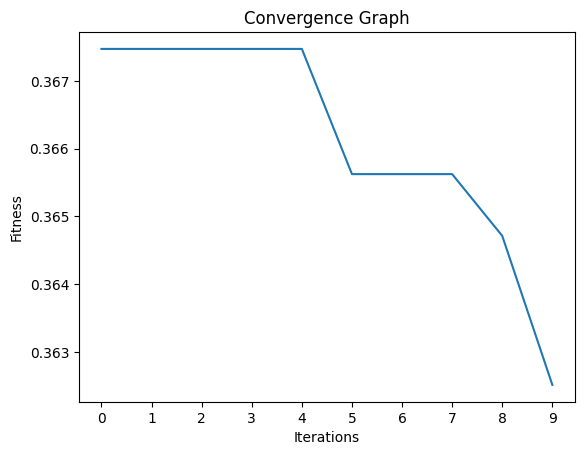

In [20]:
task.plot_convergence()

# Saving Best Features & Convergence Data

**Save into pickle file**

In [21]:
joblib.dump(theBest_features, "theBest_features_linear.pkl")
joblib.dump(conv_data, "convergence_data_linear.pkl")

['convergence_data_linear.pkl']

**Download pickle file**

In [22]:
from google.colab import files

files.download("theBest_features_linear.pkl")
files.download("convergence_data_linear.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>